# DataFrames in Julia

Let's continue our exploration of Julia by looking at one of the most popular packages in the ecosystem, [**DataFrames**](https://dataframes.juliadata.org/stable/).

DataFrames are a powerful and convenient way to work with *tabular data*. They are very popular in the R and Python ecosystems and Julia can speak DataFrames too.

## DataFrames Package

By now installing a new package in Julia should be something you know how to do, but for reference:

```julia
 ➜  JuliaHEP-2023 git:(main) julia --project=.
               _
   _       _ _(_)_     |  Documentation: https://docs.julialang.org
  (_)     | (_) (_)    |
   _ _   _| |_  __ _   |  Type "?" for help, "]?" for Pkg help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 1.9.3 (2023-08-24)
 _/ |\__'_|_|_|\__'_|  |  Official https://julialang.org/ release
|__/                   |

## At the julia> prompt type `]`

(JuliaHEP-2023) pkg> add DataFrames
...
```

Now we can see how to construct a simple data frame

In [1]:
using DataFrames

## Creating DataFrames

In [2]:
function leptons()
    name = ["electron", "muon", "tau"]
    symbol = ["e", "μ", "τ"]
    mass = [0.5109989, 105.657, 1776.86]
    charge = -1.0
    DataFrame(; name, symbol, mass, charge)
end

leptons (generic function with 1 method)

In [3]:
df_leptons = leptons()

Row,name,symbol,mass,charge
,String,String,Float64,Float64
1,electron,e,0.510999,-1.0
2,muon,μ,105.657,-1.0
3,tau,τ,1776.86,-1.0


As you can see the DataFrame is constructed with a bunch of vectors, of different types (but the same length!), and also using a scalar, when every row has the same value.

There are different ways to construct DataFrames from dictionaries, named tuples, matrices and so on, as well as using alternative column names - read the docs for all the ways!

### Loading Data from CSV

Loading data from a CSV file is extremely common. You will need to use the `CSV` package.

In [4]:
using CSV

Just before we do that, as this table is pretty big, let's set some more appropriate display parameters for the tutorial

In [5]:
ENV["DATAFRAMES_ROWS"] = 20;

And we load the table.

N.B. If you have this tutorial checked out from GitHub, or running in Binder, then the relative path below is correct, viz., in the `./assets` directory; you can also [download the data](julia-intro/docs/assets/atlas-higgs-challenge-2014-v2-reduced.csv) directly.

In [6]:
higgs_ml = CSV.read(joinpath("assets", "atlas-higgs-challenge-2014-v2-reduced.csv"), DataFrame)

Row,EventId,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String1
1,100000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,s
2,100001,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,b
3,100002,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251,b
4,100003,22.647,-1.655,0.01,53.321,-0.522,-3.1,31.082,0.06,86.062,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0,b
5,100004,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,b
6,100005,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66,b
7,100006,28.85,1.113,2.409,97.24,0.675,-0.966,38.421,-1.443,294.074,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877,s
8,100007,78.8,0.654,1.547,28.74,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.0,-999.0,-999.0,30.638,s
9,100008,39.008,2.433,-2.532,26.325,0.21,1.884,37.791,0.024,129.804,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,b


The second argument to `CSV.read` tells CSV to read the file into a DataFrame and is a nice illustration of how packages in Julia can remain independent, but still work together (DataFrames has really great [integration](https://dataframes.juliadata.org/stable/#DataFrames.jl-and-the-Julia-Data-Ecosystem) with the Julia ecosystem).

N.B. this is a *reduced* version of the [Higgs ML](http://opendata.cern.ch/record/328) dataset, restricted to 50k events, where we have also stripped out columns of derived data and event weights. This is just to make this example more *visually* manegable in this notebook - everything which is done here works just fine on the full 818k events with all columns.

To get the names of all the columns in a data frame, use `names()`:

In [7]:
println(join(names(higgs_ml), "\n"))

EventId
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Label


Also rather useful is the `describe` function:

In [8]:
describe(higgs_ml)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,EventId,1.25e5,100000,1.25e5,149999,0,Int64
2,PRI_tau_pt,38.7584,20.0,31.848,396.875,0,Float64
3,PRI_tau_eta,-0.0141847,-2.494,-0.02,2.492,0,Float64
4,PRI_tau_phi,-0.00554088,-3.142,-0.024,3.141,0,Float64
5,PRI_lep_pt,46.6231,26.0,40.501,423.438,0,Float64
6,PRI_lep_eta,-0.0234368,-2.49,-0.053,2.49,0,Float64
7,PRI_lep_phi,0.0426212,-3.142,0.084,3.142,0,Float64
8,PRI_met,41.7448,0.2,34.9075,2842.62,0,Float64
9,PRI_met_phi,-0.00511272,-3.142,-0.036,3.142,0,Float64


## Basic Operations

### Accessing Data

The template for accessing data from a DataFrame is:

```julia
my_data[selected_rows, selected_columns]
```

There are a few different patterns for this, but the template is always the same.

Extracting data (without copying) works like this:

In [9]:
higgs_ml[!, :PRI_jet_num]

50000-element Vector{Int64}:
 2
 1
 1
 0
 0
 3
 2
 1
 0
 1
 ⋮
 1
 0
 1
 0
 3
 2
 2
 0
 1

This is the recommended way to do this, although `higgs_ml.PRI_jet_num` and `higgs_ml[!, "PRI_jet_num"]` will also work

In [10]:
higgs_ml[6, :PRI_jet_num]

3

If you modify the data accessed this way, then you are modifying the primary DataFrame.

This is why in the `[]` notation a `!` is used - *caveat emptor*! 

In [11]:
higgs_ml[6, :PRI_jet_num] = 666 # Completely bonkers!

666

In [12]:
higgs_ml[6, [:PRI_jet_num]]

Row,PRI_jet_num
,Int64
6,666


When the column specifier is a scalar, one retrieves the actual value. When it's a list of columns (even length 1) then a DataFrame object is returned.

In [13]:
higgs_ml.PRI_jet_num[6] = 3 # Restore sanity!

3

### Copying Data

If a `:` notation is used for the row selection, then a copy of the data is made:

In [14]:
mini_higgs = higgs_ml[1:5, [:EventId, :PRI_tau_pt]] # Select the given columns from rows 1 to 5

Row,EventId,PRI_tau_pt
,Int64,Float64
1,100000,32.638
2,100001,42.014
3,100002,32.154
4,100003,22.647
5,100004,28.209


To show this is a copy, let's reset the values of $\tau_{p_T}$:

In [15]:
mini_higgs[!, :PRI_tau_pt] = [1.2, 2.3, 3.4, 4.5, 5.6]

5-element Vector{Float64}:
 1.2
 2.3
 3.4
 4.5
 5.6

In [16]:
higgs_ml[!, :PRI_tau_pt][1:5]

5-element Vector{Float64}:
 32.638
 42.014
 32.154
 22.647
 28.209

The primary data stayed unmodified.

One can use an appropriate row vector to set any row in the data frame:

In [17]:
mini_higgs[3, 1:2] = [666, 999.0]
mini_higgs

Row,EventId,PRI_tau_pt
,Int64,Float64
1,100000,1.2
2,100001,2.3
3,666,999.0
4,100003,4.5
5,100004,5.6


The selection of columns is very flexible:

- `Not()` - exclude columns from the selection
- `Cols()` - union of arguments in the selection
- `regexp` - a regular expression match against column names
- `N::Integer` - pick the Nth column (and `M:N` works as you would expect)
- `:` - all columns *not yet selected*

The selected output column ordering is respected, so allowing for easy reordering of columns. This is particularly useful when operating on a data frame with `select`, which we will meet below, and with the fact that `:` will not select columns already included.

In [18]:
higgs_jets = higgs_ml[:, Cols(:EventId, r"PRI_jet.*")]

Row,EventId,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100000,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497
2,100001,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226
3,100002,1,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251
4,100003,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0
5,100004,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
6,100005,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66
7,100006,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877
8,100007,1,30.638,-0.715,-1.724,-999.0,-999.0,-999.0,30.638
9,100008,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


### Selection from `bool`

A powerful way to select data is to select rows on a boolean vector constructed from the data frame itself, e.g., to select all rows that are signal events do the following.

(Below we explain why you need to use `.==` to broadcast the comparison.)

In [19]:
higgs_ml[higgs_ml.Label .== "s", [:EventId, :Label]]

Row,EventId,Label
,Int64,String1
1,100000,s
2,100006,s
3,100007,s
4,100009,s
5,100015,s
6,100017,s
7,100023,s
8,100026,s
9,100027,s


### Views

With `view()` or `@view` we create a view into a dataframe, which is fast and efficient

In [20]:
leading_jets = @view higgs_ml[:, r"PRI_jet_leading.*"]

Row,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi
,Float64,Float64,Float64
1,67.435,2.15,0.444
2,46.226,0.725,1.158
3,44.251,2.053,-2.028
4,-999.0,-999.0,-999.0
5,-999.0,-999.0,-999.0
6,90.547,-2.412,-0.653
7,123.01,0.864,1.45
8,30.638,-0.715,-1.724
9,-999.0,-999.0,-999.0


Just to emphasise the point, *`higgs_jets` is an independent data frame, and `leading_jets` is a data frame view into the primary data*.

### Broadcast Assignment

To broadcast operations across a data frame, we use Julia's `.=` operation

In [21]:
mini_higgs[!, :PRI_tau_pt] .= 999.0
mini_higgs

Row,EventId,PRI_tau_pt
,Int64,Float64
1,100000,999.0
2,100001,999.0
3,666,999.0
4,100003,999.0
5,100004,999.0


In [22]:
mini_higgs[!, :EventId] .+= 10
mini_higgs

Row,EventId,PRI_tau_pt
,Int64,Float64
1,100010,999.0
2,100011,999.0
3,676,999.0
4,100013,999.0
5,100014,999.0


### Adding New Data

Adding new data to a data frame is just a matter of assigning to a new column (using the Julia *symbol* for the name is useful)

In [23]:
mini_higgs[:, :name] = ["alice", "bob", "ciarn", "dinah", "elmer"]
mini_higgs

Row,EventId,PRI_tau_pt,name
,Int64,Float64,String
1,100010,999.0,alice
2,100011,999.0,bob
3,676,999.0,ciarn
4,100013,999.0,dinah
5,100014,999.0,elmer


## Data Manipulation

So much for selecting and replacing data - how do we do more interesting thing?

The first thing we might want to do is ensure that we can select events that match some particular criteria - for that we can use the `filter` function, like this:

In [24]:
lots_o_jets(n_jets) = n_jets >= 3
filter(:PRI_jet_num => lots_o_jets, higgs_jets)

Row,EventId,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100005,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66
2,100011,3,76.773,-0.79,0.303,56.876,1.773,-2.079,165.64
3,100031,3,182.449,1.383,0.001,38.006,-1.257,-0.609,253.461
4,100038,3,114.602,0.619,0.165,77.053,2.433,-2.637,341.947
5,100039,3,88.399,-2.168,-1.423,77.27,-2.385,1.876,198.632
6,100059,3,80.042,-0.856,1.304,52.501,0.638,-1.114,182.413
7,100060,3,78.174,-1.668,-0.978,58.097,-0.989,-1.727,212.314
8,100070,3,59.401,1.342,-0.369,53.711,-2.577,2.14,162.577
9,100077,3,56.951,0.749,-0.296,42.88,-2.229,-2.825,140.06


Usually one would not want to bother with a named function for these kind of trivial selections - use an anonymous function:

In [25]:
filter(:PRI_jet_num => nj -> nj >= 3, higgs_jets)

Row,EventId,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100005,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66
2,100011,3,76.773,-0.79,0.303,56.876,1.773,-2.079,165.64
3,100031,3,182.449,1.383,0.001,38.006,-1.257,-0.609,253.461
4,100038,3,114.602,0.619,0.165,77.053,2.433,-2.637,341.947
5,100039,3,88.399,-2.168,-1.423,77.27,-2.385,1.876,198.632
6,100059,3,80.042,-0.856,1.304,52.501,0.638,-1.114,182.413
7,100060,3,78.174,-1.668,-0.978,58.097,-0.989,-1.727,212.314
8,100070,3,59.401,1.342,-0.369,53.711,-2.577,2.14,162.577
9,100077,3,56.951,0.749,-0.296,42.88,-2.229,-2.825,140.06


Need to filter based on multiple columns? No problem:

In [26]:
filter([:PRI_jet_num, :PRI_jet_leading_pt] => (nj, ptj) -> (nj >= 3) && (ptj > 100), higgs_jets)

Row,EventId,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100031,3,182.449,1.383,0.001,38.006,-1.257,-0.609,253.461
2,100038,3,114.602,0.619,0.165,77.053,2.433,-2.637,341.947
3,100084,3,176.49,-0.558,2.664,73.566,0.49,-1.616,333.586
4,100118,3,148.174,1.109,-1.21,140.818,0.796,1.344,380.547
5,100192,3,138.456,-1.117,1.43,54.651,3.144,0.688,226.618
6,100206,3,127.039,-0.111,2.166,115.897,0.352,-0.622,322.533
7,100232,3,117.933,-1.322,2.031,74.298,-0.881,1.982,277.127
8,100243,3,230.617,1.242,1.609,61.046,-1.299,-1.247,337.151
9,100311,3,144.005,-0.925,2.879,47.204,0.4,1.11,233.132


Notice that the arguments to the `filter` method follow the Julia convention, with the filter parameters given first, followed by the data object.

Of note is the selector pattern `columns => filter_funtion` - we shall see this repeated!

### Derived Data

In [27]:
using Statistics

To get summary data for a data frame, use the `combine()` function. There is a mini-language for applying functions to the data is the same as for `filter` (but note the arguments are reversed). The second `=>` determines the destination column (which will be created, if needed). If you do not give this then a plausible name will be generated for the output.

In [28]:
combine(higgs_jets, :PRI_jet_all_pt => mean => :jet_pt_mean)

Row,jet_pt_mean
,Float64
1,72.9546


The special property of `combine` is that it collapses the output down to unique values.

Scalar and vector outputs can also be combined:

In [29]:
combine(higgs_jets, :PRI_jet_all_pt => mean => :jet_pt_mean, :PRI_jet_num => unique => :n_jets)

Row,jet_pt_mean,n_jets
,Float64,Int64
1,72.9546,2
2,72.9546,1
3,72.9546,0
4,72.9546,3


But this probably isn't quite what we wanted to do as the mean of $p_T$ is always calculated for all jets.

To do this in a more useful way, we use the `groupby()` function to split the data frame up by a certain criterion:

In [30]:
combine(groupby(higgs_jets, :PRI_jet_num), :PRI_jet_all_pt => mean, nrow)

Row,PRI_jet_num,PRI_jet_all_pt_mean,nrow
,Int64,Float64,Int64
1,0,0.0,19992
2,1,64.6523,15518
3,2,149.437,10054
4,3,257.442,4436


### Derived Data and `missing` values

For some analysis, it's pretty useful to add derived values, which we know how to do:

In [31]:
select(higgs_ml, :PRI_jet_leading_pt => (x -> x.^2) => :pt2)

Row,pt2
,Float64
1,4547.48
2,2136.84
3,1958.15
4,998001.0
5,998001.0
6,8198.76
7,15131.5
8,938.687
9,998001.0


So far, so good, but notice that there are a lot of columns where `pt==-999.0`, which was the input dataset convention for a missing value, so this isn't quite what we wanted.

We could filter out all the unphysical values, but with data frames there is an option to set such values to `missing`.

First, for a data frame that does not yet have missing values, first we call the `allowmissing()` function - this changes our columns of type `T` into `Union{T, Missing}`. Then we convert all the negative values we find into `missing`.

In [32]:
higgs_set_missing_jets = allowmissing(higgs_ml)[:, Cols(:EventId, r"PRI_jet.*")] # Just work with jets for now
missing_value(v) = if (v===missing || v<0) missing else v end
transform!(higgs_set_missing_jets, :PRI_jet_leading_pt => ByRow(missing_value) => :PRI_jet_leading_pt)

Row,EventId,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,100000,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497
2,100001,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226
3,100002,1,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251
4,100003,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0
5,100004,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
6,100005,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66
7,100006,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877
8,100007,1,30.638,-0.715,-1.724,-999.0,-999.0,-999.0,30.638
9,100008,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


Of note is the convenience function `ByRow()` that takes care of broadcasting the function to each row in the column(s).

Also we used here the `transform` function - this is very like `filter`, but more specialised for DataFrames (the argument order is different, with the data frame coming first). In fact we used `transform!`, so we modified directly the `higgs_set_missing_jets` data frame.

In [33]:
select!(higgs_set_missing_jets, :EventId, :PRI_jet_leading_pt => (x -> x.^2) => :pt2, :)

Row,EventId,pt2,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64?,Float64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,100000,4547.48,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497
2,100001,2136.84,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226
3,100002,1958.15,1,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251
4,100003,missing,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0
5,100004,missing,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
6,100005,8198.76,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66
7,100006,15131.5,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877
8,100007,938.687,1,30.638,-0.715,-1.724,-999.0,-999.0,-999.0,30.638
9,100008,missing,0,missing,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


Notice that `missing` values were handled nicely!

We also used the `select`function here. This is very similar to `transform`, just that only the columns which we ask for are included in the result, rather than all columns. As `select` returns the columns in the order we ask for it was simple to add the new `pt2` column where we wanted it to be.

It should be noted that `missing` values are *not some special magical implementation*. They are a well defined data type in Julia (the type is `Missing`), for which common arithmetic operations are well defined:

In [34]:
@show missing * missing
@show 1.0 + missing
@show missing * 3;

missing * missing = missing
1.0 + missing = missing
missing * 3 = missing


This is a great example of how Julia's type system works so powerfully with multiple dispatch!

### Transform, Select, Combine, GroupBy, Filter

Just as a short summary of the data frame manipulation functions we met:

| **Function** | **Description** |
|---|---|
| `transform` | Apply a transformation operation to one or more columns, return all columns plus any new ones |
| `select` | Apply a transformation operation to one or more columns, only return columns that are selected, in the order requested |
| `combine` | Apply a transformation operation, then collapse the result for identical output rows |
| `groupby` | Split a data frame into pieces according to a certain criterion |
| `filter` | Apply a selection operation to a data frame - argument order follows the method convention |

The use of `groupby` and `combine` allows us to powerfully manipulate data in Julia using the well known [*Split, Combine, Apply* strategy](http://www.jstatsoft.org/v40/i01), originally introduced for S.

## Visualising

There is extremely good integration between the Julia plotting ecosystem and data frames. Here we give a quick tour of some of the plots that we can easily make with this data:

In [35]:
using Plots
using StatsPlots

For convenience, we'll create a subset of our data, selecting higher $p_T$ jets. We also want to benefit from `missing` columns.

In [36]:
interesting_jets = allowmissing(filter([:PRI_jet_num, :PRI_jet_leading_pt] => (nj, ptj) -> (nj >= 1) && (ptj > 100), higgs_jets)[1:2000, :])
select!(interesting_jets, :EventId, :PRI_jet_subleading_pt => ByRow(missing_value) => :PRI_jet_subleading_pt, :)

Row,EventId,PRI_jet_subleading_pt,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
,Int64?,Float64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,100006,56.867,2,123.01,0.864,1.45,0.131,-2.767,179.877
2,100009,missing,1,167.735,-2.767,-2.514,-999.0,-999.0,167.735
3,100023,82.477,2,195.533,1.156,1.416,-0.798,-2.785,278.009
4,100027,43.458,2,170.712,-1.961,2.22,2.974,-0.103,214.17
5,100031,38.006,3,182.449,1.383,0.001,-1.257,-0.609,253.461
6,100038,77.053,3,114.602,0.619,0.165,2.433,-2.637,341.947
7,100057,56.31,2,214.449,-0.058,1.525,1.151,-1.743,270.759
8,100078,70.786,2,101.934,3.139,0.444,-2.683,-0.567,172.721
9,100079,missing,1,116.316,-1.171,0.641,-999.0,-999.0,116.316


The first example is a simple scatter plot of the $(\eta, \phi)$ coordinates of the leading jet:

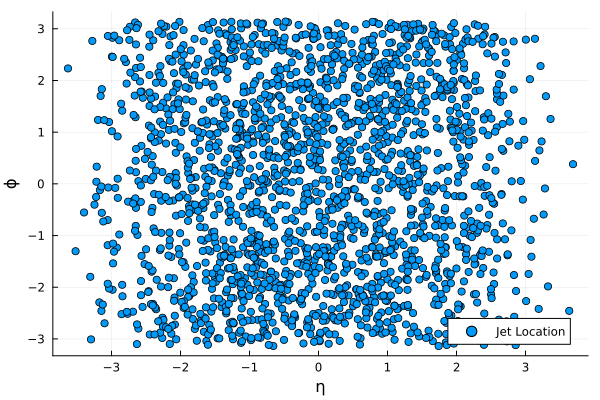

In [37]:
@df interesting_jets scatter(:PRI_jet_leading_eta, :PRI_jet_leading_phi, label="Jet Location", xlabel="η", ylabel="ϕ")

For this data the marginal histogram is always an interesting way to look at the data distribution

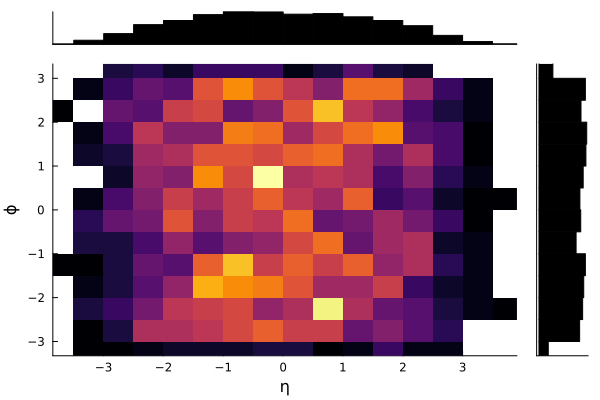

In [38]:
@df interesting_jets marginalhist(:PRI_jet_leading_eta, :PRI_jet_leading_phi, label="Jet Location", bins=20, xlabel="η", ylabel="ϕ")

Now we can look at a histogram of the leading jets' $p_T$:

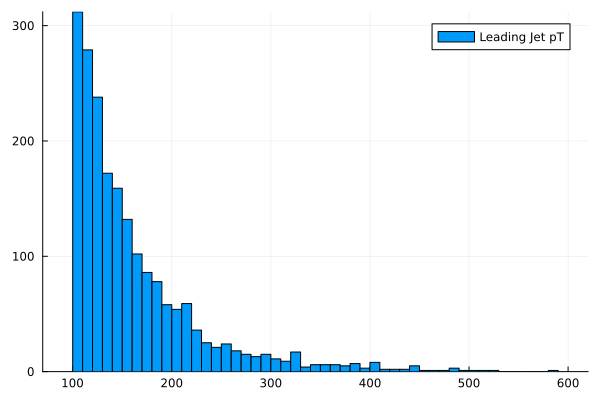

In [39]:
@df interesting_jets histogram(:PRI_jet_leading_pt, label="Leading Jet pT")

And it's very easy to plot both the leading and subleading distribution together:

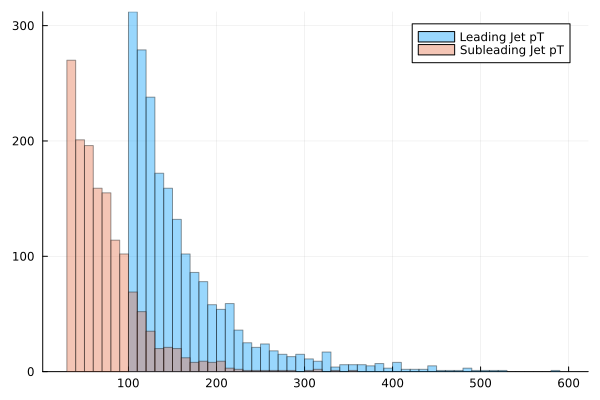

In [40]:
@df interesting_jets histogram(:PRI_jet_leading_pt, alpha=0.4, label="Leading Jet pT")
@df interesting_jets histogram!(:PRI_jet_subleading_pt, alpha=0.4, label="Subleading Jet pT")

The marginal histogram shows the relationship between the two jet components:

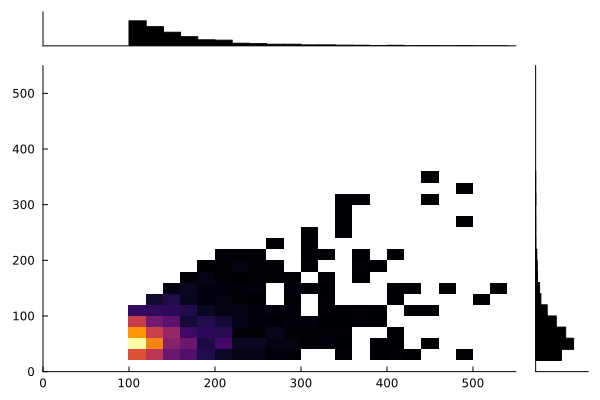

In [41]:
@df interesting_jets marginalhist(:PRI_jet_leading_pt, :PRI_jet_subleading_pt, label="Jet Location", bins=20, xlims=(0, 550), ylims=(0,550))

Finally, let's look at the distance in $(\eta, \phi)$ space between the leading and subleading jet.

In [42]:
# Clean up the "missing data" columns for the subleading jet
select!(interesting_jets, :EventId, 
    :PRI_jet_subleading_eta => ByRow(missing_value) => :PRI_jet_subleading_eta, 
    :PRI_jet_subleading_phi => ByRow(missing_value) => :PRI_jet_subleading_phi, :);

We define a function `dist` for the cartesian distance:

In [43]:
δϕ(ϕ1, ϕ2) = begin
    δ = ϕ1 - ϕ2
    while δ > pi
        δ -= 2π
    end
    while δ < -pi
        δ += 2π
    end
    δ
end
dist(η1::Number, ϕ1::Number, η2::Number, ϕ2::Number) = sqrt((η1-η2)^2 + δϕ(ϕ1, ϕ2)^2)
dist(η1, ϕ1, η2, ϕ2) = missing

dist (generic function with 2 methods)

This is a little bit tricksy - we need to ensure that
- when the ϕ separation is calculated we normalise it to [-π, π]
- if any of the values are `missing` then the distance is `missing`
  - we use Julia's multiple dispatch to achieve that by defining two implementations for the `dist` method

Now run this function to calculate the angle between the two jets:

In [44]:
select!(interesting_jets, :EventId,
    [:PRI_jet_leading_eta, :PRI_jet_leading_phi, :PRI_jet_subleading_eta, :PRI_jet_subleading_phi] => ByRow(dist) => :Jet_distance, :)

Row,EventId,Jet_distance,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_subleading_pt,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
,Int64?,Float64?,Float64?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?,Float64?
1,100006,missing,0.131,missing,56.867,2,123.01,0.864,1.45,179.877
2,100009,missing,missing,missing,missing,1,167.735,-2.767,-2.514,167.735
3,100023,missing,missing,missing,82.477,2,195.533,1.156,1.416,278.009
4,100027,missing,2.974,missing,43.458,2,170.712,-1.961,2.22,214.17
5,100031,missing,missing,missing,38.006,3,182.449,1.383,0.001,253.461
6,100038,missing,2.433,missing,77.053,3,114.602,0.619,0.165,341.947
7,100057,missing,1.151,missing,56.31,2,214.449,-0.058,1.525,270.759
8,100078,missing,missing,missing,70.786,2,101.934,3.139,0.444,172.721
9,100079,missing,missing,missing,missing,1,116.316,-1.171,0.641,116.316


Now we can look at the distribution of the separation:

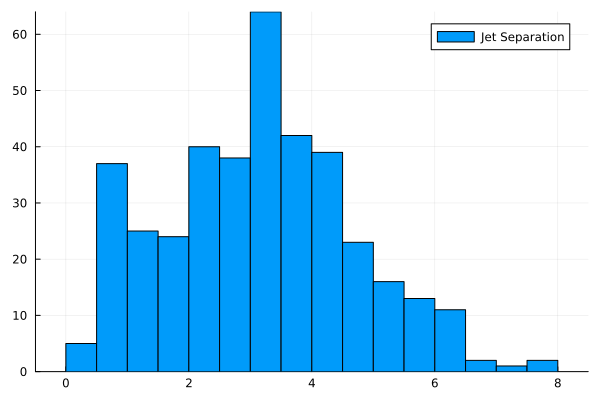

In [45]:
@df interesting_jets histogram(:Jet_distance, label="Jet Separation")

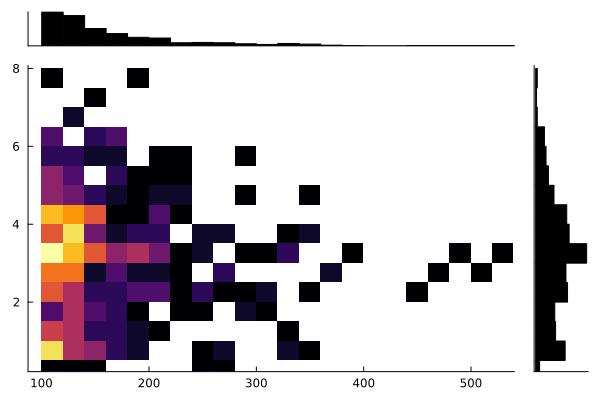

In [46]:
@df interesting_jets marginalhist(:PRI_jet_leading_pt, :Jet_distance, label="Jet Separation by Primary pT", bins=20)